# Project 1 Student Marks

Aim to import data from sql and to perform Exploratory Data Analysis

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset from sql and loading the dataset in pandas

In [2]:
cnt = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user='root',
    password='Password',
    database='student')
data=pd.read_sql_query("select * from studmarks",cnt)
data
data.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53


In [3]:
data.shape

(10, 11)

In [4]:
data.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

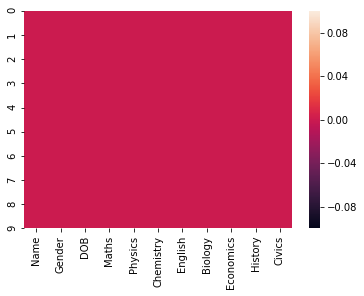

In [5]:
# Lets Check the null values on the dataset
sns.heatmap(data.isnull())

## Statistical Summary

In [6]:
data.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


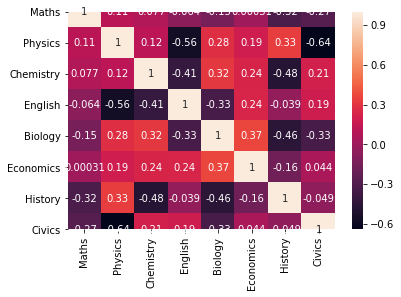

In [7]:
#Lets Check the correlation of the data
sns.heatmap(data.corr(),annot=True)

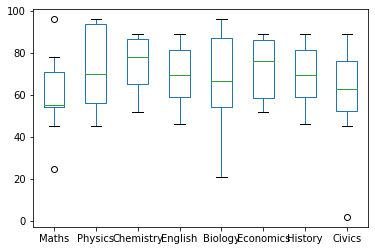

In [12]:
data.plot.box()

From the above graph we can see that the mean marks of the class lies between 60 to 80

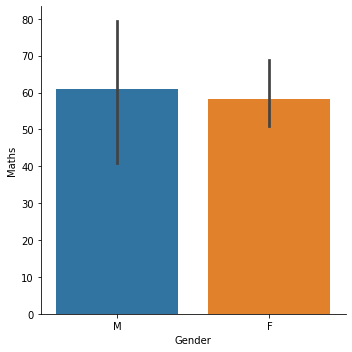

In [14]:
sns.catplot(x='Gender',y='Maths',data=data,kind='bar')

From the above graph we can see that boys are silghtly better in maths compared to girls

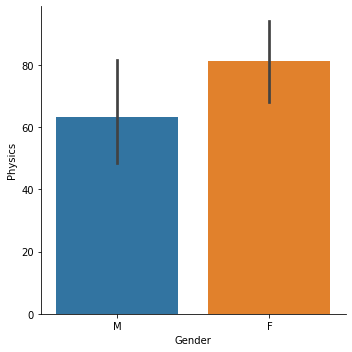

In [25]:
sns.catplot(x='Gender',y='Physics',data=data,kind='bar')

From the above we can see that the Girls are doing much beter in physics than boys

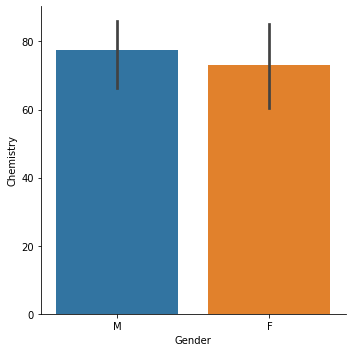

In [16]:
sns.catplot(x='Gender',y='Chemistry',data=data,kind='bar')

From the above we can see that the Boys are doing silghtly beter than girl in chemistry

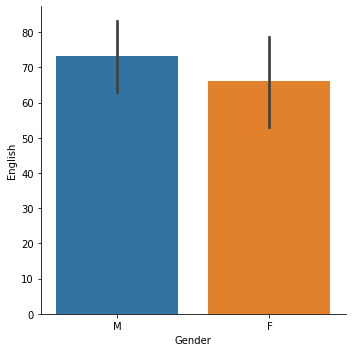

In [17]:
sns.catplot(x='Gender',y='English',data=data,kind='bar')

From the above we can see that boys are performing good in English

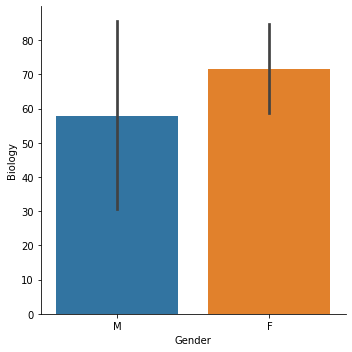

In [18]:
sns.catplot(x='Gender',y='Biology',data=data,kind='bar')

From the above we can see that Girls are performing good in Biology

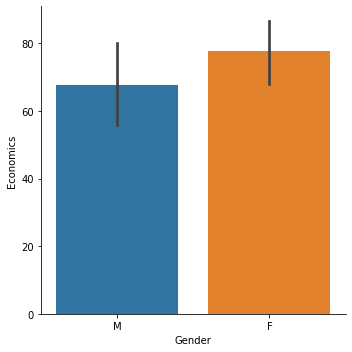

In [26]:
sns.catplot(x='Gender',y='Economics',data=data,kind='bar')

From the above we can see that Girls are performing good in Economics

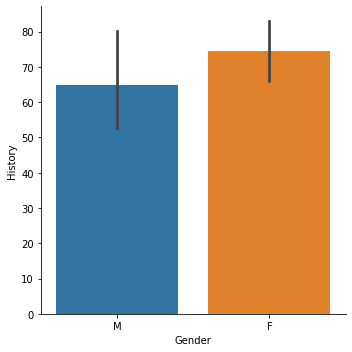

In [20]:
sns.catplot(x='Gender',y='History',data=data,kind='bar')

From the above we can see that Girls are performing good in History

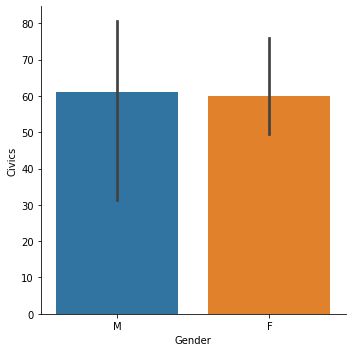

In [22]:
sns.catplot(x='Gender',y='Civics',data=data,kind='bar')

From the above we can see that boys are slightly performing good in Civics

In [33]:
# Now lets add a column as PCM to check the Physicis, Chemistry, Maths average should be more than 75 to get into the science department.
x=data.iloc[:,4:6]
data['PCM']=x.mean(axis=1)
data.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,PCM
0,John,M,05-04-1988,55,45,56,87,21,52,89,65,50.5
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2,87.0
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74,71.5
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45,91.0
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53,87.0


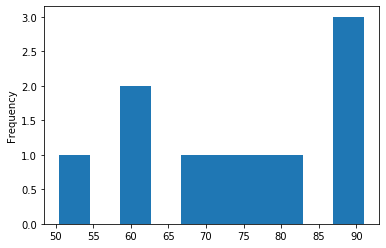

In [34]:
#Lets plot the PCM
data['PCM'].plot.hist()

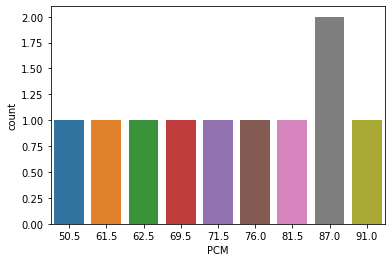

In [35]:
sns.countplot(data['PCM'])

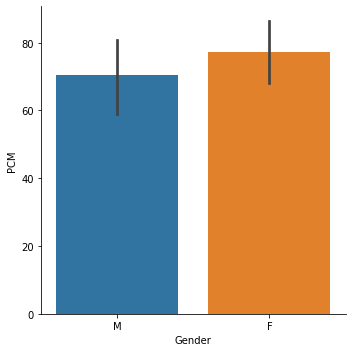

In [36]:
sns.catplot(x='Gender',y='PCM',data=data,kind='bar')

From the above we can see that the Girls perform higher in PCM score and they might go for science department

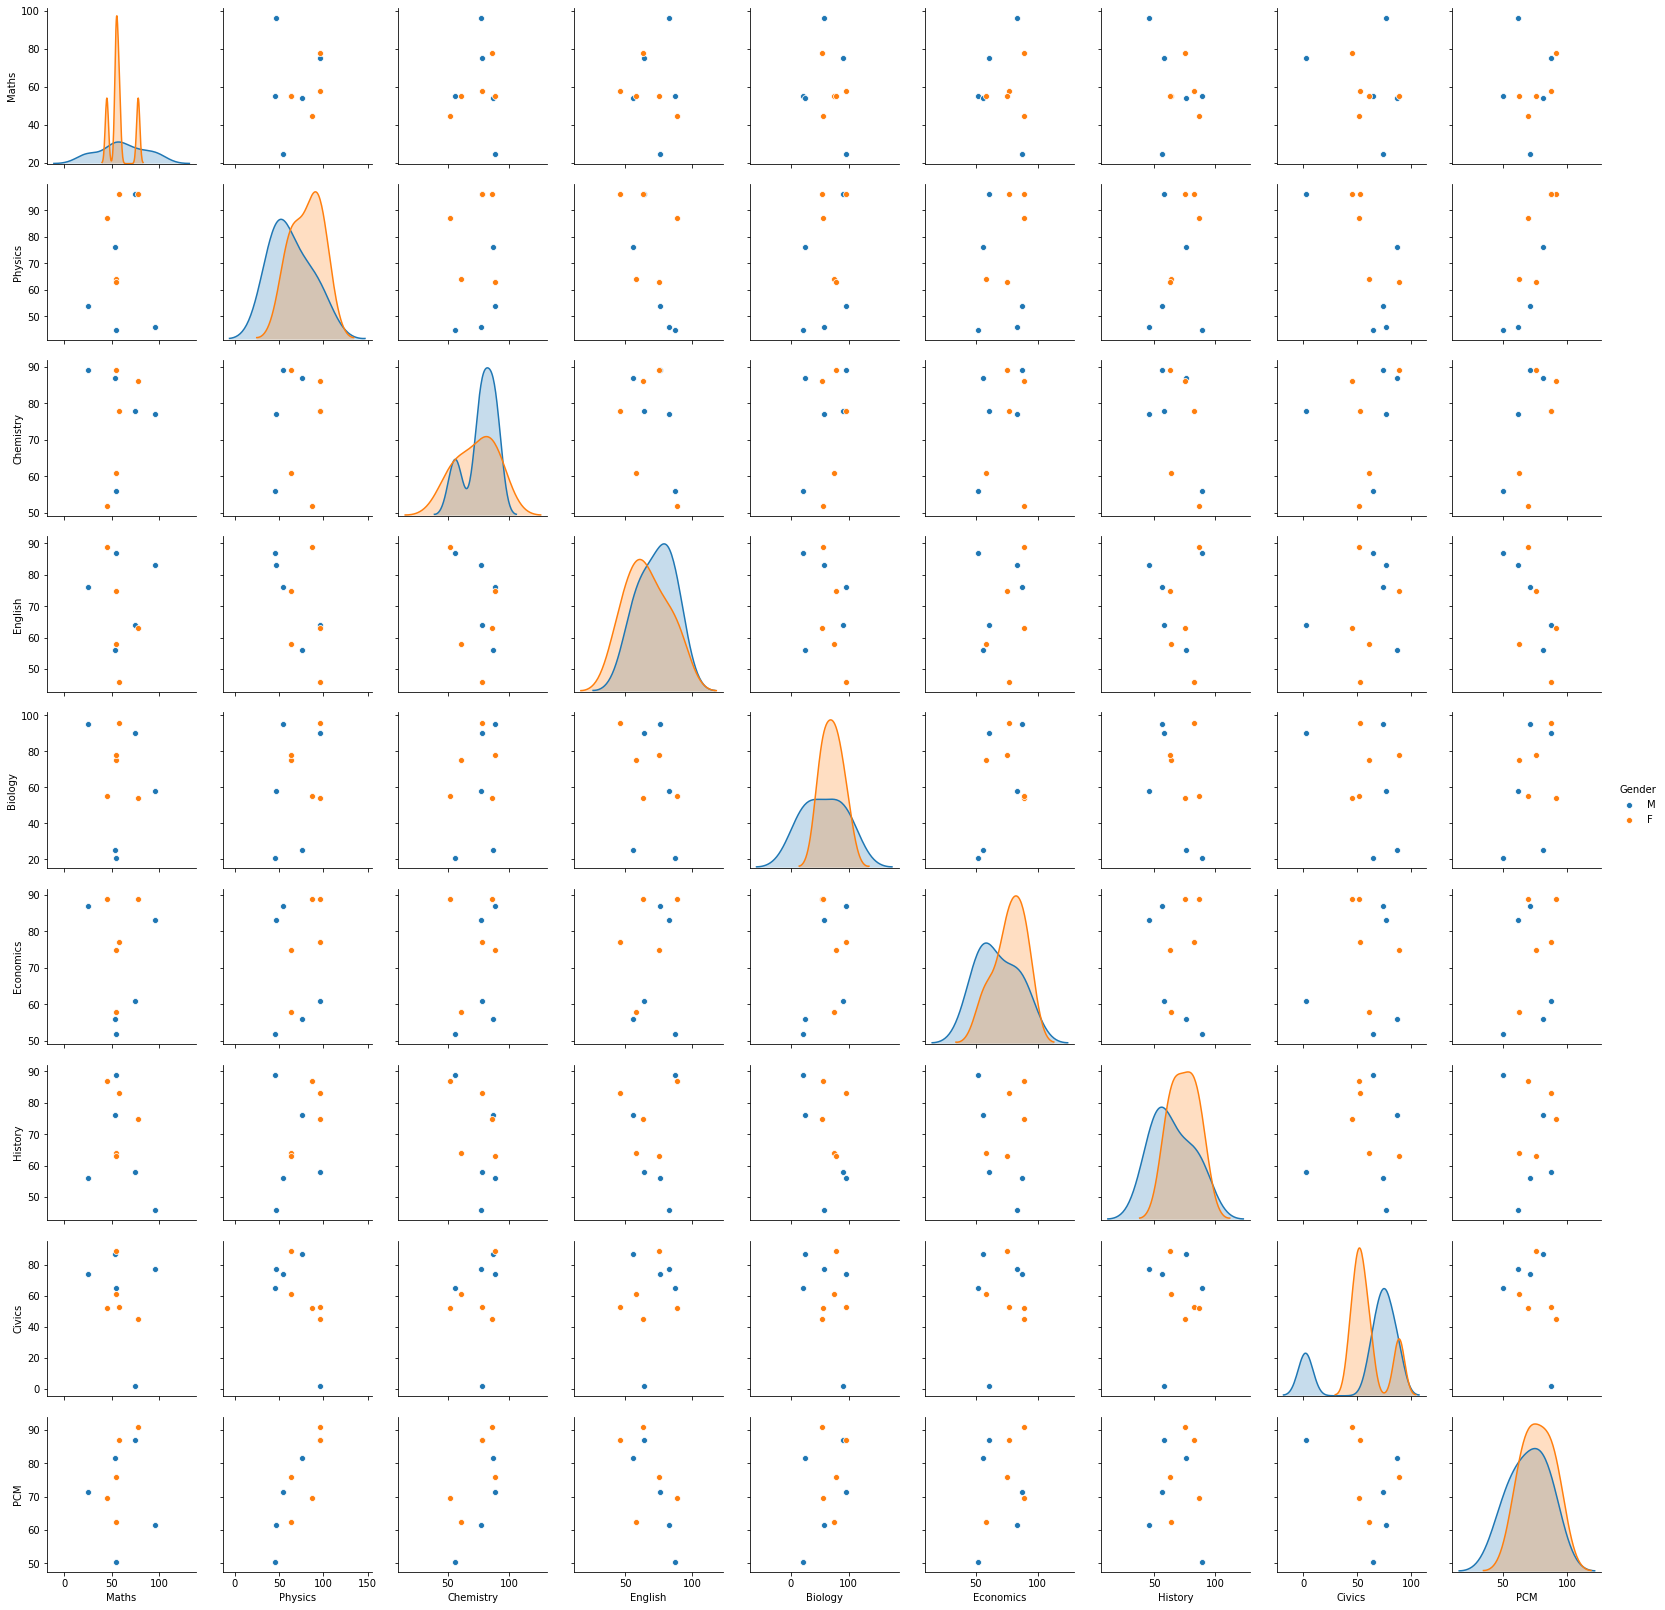

In [38]:
sns.pairplot(data,hue='Gender')